# Report - Analytics para Big Data
## Bachelor in Information Systems / PUCPR

Professor Jean Paul Barddal

`Matheus Biscalchim` - `matheusbiscalchimmm@gmail.com`

`Lucas Cordeiro de Lima` - `lucas.cordeiro@pucpr.edu.br`

`Eduardo Siegert Antunes` - `eduardo.siegert@pucpr.edu.br`



`2022`

# Import the libs you need

In [ ]:
# Import all packages you need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.

# Base de dados do censo

- Fonte: https://archive.ics.uci.edu/ml/datasets/adult

In [ ]:
df = pd.read_csv('/content/census.csv')
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
# clean and treat the data here
df['workclass'] = df['workclass'].replace(' ?','unknown')
df['occupation'] = df['occupation'].replace(' ?','unknown')
df['native-country'] = df['native-country'].replace(' ?','unknown')

In [ ]:
df['continents'] = 'North-America'
df.size

520976

In [ ]:
dfCount = df
df_NA = df

In [ ]:
df_EU = df.loc[(df['native-country'] ==' France') | (df['native-country'] ==' Germany')| (df['native-country'] ==' Portugal')
| (df['native-country'] ==' Italy') | (df['native-country'] ==' England') | (df['native-country'] ==' Poland')
| (df['native-country'] ==' Scotland') | (df['native-country'] ==' Greece') | (df['native-country'] ==' Ireland')
| (df['native-country'] ==' Hungary') | (df['native-country'] ==' Holand-Netherlands')]

In [ ]:
df_EU

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,continents
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K,North-America
122,30,Private,77143,Bachelors,13,Never-married,Exec-managerial,Own-child,Black,Male,0,0,40,Germany,<=50K,North-America
163,28,Private,88419,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Asian-Pac-Islander,Female,0,0,40,England,<=50K,North-America
201,19,unknown,170653,HS-grad,9,Never-married,unknown,Own-child,White,Male,0,0,40,Italy,<=50K,North-America
217,38,Private,182609,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,Poland,<=50K,North-America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32341,74,Self-emp-not-inc,199136,Bachelors,13,Widowed,Craft-repair,Not-in-family,White,Male,15831,0,8,Germany,>50K,North-America
32352,28,Private,119793,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal,<=50K,North-America
32371,49,Self-emp-not-inc,111959,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,Scotland,>50K,North-America
32403,48,Private,325372,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Portugal,<=50K,North-America


In [ ]:
df_EU['native-country'].unique()

array([' England', ' Germany', ' Italy', ' Poland', ' Portugal',
       ' France', ' Scotland', ' Greece', ' Ireland', ' Hungary',
       ' Holand-Netherlands'], dtype=object)

In [ ]:
df_EU['continents'] ='Europe'
a = df_EU.index
df_NA = df_NA.drop(a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_EU

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,continents
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K,Europe
122,30,Private,77143,Bachelors,13,Never-married,Exec-managerial,Own-child,Black,Male,0,0,40,Germany,<=50K,Europe
163,28,Private,88419,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Asian-Pac-Islander,Female,0,0,40,England,<=50K,Europe
201,19,unknown,170653,HS-grad,9,Never-married,unknown,Own-child,White,Male,0,0,40,Italy,<=50K,Europe
217,38,Private,182609,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,Poland,<=50K,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32341,74,Self-emp-not-inc,199136,Bachelors,13,Widowed,Craft-repair,Not-in-family,White,Male,15831,0,8,Germany,>50K,Europe
32352,28,Private,119793,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal,<=50K,Europe
32371,49,Self-emp-not-inc,111959,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,Scotland,>50K,Europe
32403,48,Private,325372,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Portugal,<=50K,Europe


In [ ]:
df_NA['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'unknown',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' Canada',
       ' Iran', ' Philippines', ' Columbia', ' Cambodia', ' Thailand',
       ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Dominican-Republic',
       ' El-Salvador', ' Guatemala', ' China', ' Japan', ' Yugoslavia',
       ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Trinadad&Tobago',
       ' Nicaragua', ' Vietnam', ' Hong'], dtype=object)

In [ ]:
df_AS = df_NA.loc[(df['native-country'] ==' India') | (df['native-country'] ==' Iran')| (df['native-country'] ==' Philippines')
| (df['native-country'] ==' Cambodia') | (df['native-country'] ==' Thailand') | (df['native-country'] ==' Laos')
| (df['native-country'] ==' Taiwan') | (df['native-country'] ==' China')| (df['native-country'] ==' Japan') | (df['native-country'] ==' Yugoslavia')
| (df['native-country'] ==' Vietnam')| (df['native-country'] ==' Hong')]

In [ ]:
df_AS['continents'] ='Asia'
df_AS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,continents
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,Asia
135,38,Federal-gov,125933,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Iran,>50K,Asia
152,33,Private,163003,Bachelors,13,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K,Asia
237,41,Private,180138,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Iran,>50K,Asia
255,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32370,53,Self-emp-not-inc,137547,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,27828,0,40,Philippines,>50K,Asia
32376,40,Private,306225,HS-grad,9,Divorced,Craft-repair,Not-in-family,Asian-Pac-Islander,Female,0,0,40,Japan,<=50K,Asia
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K,Asia
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K,Asia


In [ ]:
a = df_AS.index
df_NA = df_NA.drop(a)
df_NA

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,continents
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,North-America
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,North-America
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,North-America
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,North-America


In [ ]:
df_NA['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', 'unknown', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' Canada', ' Columbia',
       ' Ecuador', ' Haiti', ' Dominican-Republic', ' El-Salvador',
       ' Guatemala', ' Peru', ' Outlying-US(Guam-USVI-etc)',
       ' Trinadad&Tobago', ' Nicaragua'], dtype=object)

In [ ]:
df_AC = df_NA.loc[(df['native-country'] ==' Cuba') | (df['native-country'] ==' Jamaica')| (df['native-country'] ==' Puerto-Rico')
| (df['native-country'] ==' Honduras') | (df['native-country'] ==' Haiti')| (df['native-country'] ==' Dominican-Republic')
| (df['native-country'] ==' El-Salvador')| (df['native-country'] ==' Guatemala') | (df['native-country'] ==' Trinadad&Tobago')
| (df['native-country'] ==' Nicaragua')]


In [ ]:
df_AC['continents'] ='Central-America'
df_AC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,continents
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Central-America
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,Central-America
35,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K,Central-America
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K,Central-America
57,35,Private,56352,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Puerto-Rico,<=50K,Central-America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32263,27,Private,176761,HS-grad,9,Never-married,Craft-repair,Other-relative,Other,Male,0,0,40,Nicaragua,<=50K,Central-America
32359,46,Private,139514,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,<=50K,Central-America
32378,39,Private,214896,HS-grad,9,Separated,Other-service,Not-in-family,White,Female,0,0,40,El-Salvador,<=50K,Central-America
32456,30,Self-emp-not-inc,261943,11th,7,Married-spouse-absent,Craft-repair,Not-in-family,White,Male,0,0,30,Honduras,<=50K,Central-America


In [ ]:
a = df_AC.index
df_NA = df_NA.drop(a)

In [ ]:
df_NA['native-country'].unique()

array([' United-States', 'unknown', ' Mexico', ' South', ' Canada',
       ' Columbia', ' Ecuador', ' Peru', ' Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [ ]:
df_SA = df_NA.loc[(df['native-country'] ==' South') | (df['native-country'] ==' Ecuador')| (df['native-country'] ==' Peru')]

In [ ]:
df_SA['continents'] ='South-America'
df_SA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,continents
27,54,unknown,180211,Some-college,10,Married-civ-spouse,unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,South-America
289,50,Private,193884,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Ecuador,<=50K,South-America
668,20,unknown,114746,11th,7,Married-spouse-absent,unknown,Own-child,Asian-Pac-Islander,Female,0,1762,40,South,<=50K,South-America
916,43,Private,158926,Masters,14,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,0,0,50,South,<=50K,South-America
1430,49,Private,147322,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,Peru,<=50K,South-America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30783,36,Private,126569,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,Ecuador,>50K,South-America
31302,60,Private,85995,Masters,14,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,50,South,>50K,South-America
31368,27,Self-emp-not-inc,153805,Some-college,10,Married-civ-spouse,Transport-moving,Other-relative,Other,Male,0,0,50,Ecuador,>50K,South-America
31751,22,unknown,148955,Some-college,10,Never-married,unknown,Own-child,Asian-Pac-Islander,Female,0,0,15,South,<=50K,South-America


In [ ]:
a = df_SA.index
df_NA = df_NA.drop(a)

In [ ]:
df_NA['native-country'].unique()

array([' United-States', 'unknown', ' Mexico', ' Canada', ' Columbia',
       ' Outlying-US(Guam-USVI-etc)'], dtype=object)

In [ ]:
df_Unknow = df_NA.loc[(df['native-country'] =='unknown')]
df_Unknow['continents'] ='Unknown'
df_Unknow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,continents
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,unknown,>50K,Unknown
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,unknown,>50K,Unknown
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,unknown,<=50K,Unknown
61,32,unknown,293936,7th-8th,4,Married-spouse-absent,unknown,Not-in-family,White,Male,0,0,40,unknown,<=50K,Unknown
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,unknown,<=50K,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,unknown,>50K,Unknown
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,unknown,<=50K,Unknown
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,unknown,<=50K,Unknown
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,unknown,>50K,Unknown


In [ ]:
a = df_Unknow.index
df_NA = df_NA.drop(a)

In [ ]:
df = pd.concat([df_NA,df_EU,df_AS,df_AC,df_SA,df_Unknow])

In [ ]:
df.reset_index()

,index,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,continents
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
4,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,North-America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,unknown,>50K,Unknown
32557,32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,unknown,<=50K,Unknown
32558,32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,unknown,<=50K,Unknown
32559,32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,unknown,>50K,Unknown


# Overview

In this section, you should provide an overview of the dataset that includes at least the following:
* Its context
* Number of features
* Number of instances
* Feature types
* Feature description

## **Contexto**
### A extração foi feita por Barry Becker do banco de dados do Censo de 1994. Um conjunto de registros razoavelmente limpos foi extraído usando as seguintes condições:    
<br>
#### (( AAGE > 16) && ( AGI > 100) && ( AFNLWGT > 1) &&  ( HRSWK > 0))
<br>
<br>

1.   -AAGE-idade minima
2.   -AGI-idade máxima
3.   -AFNLWGT-peso final. Em outras palavras, este é o número de pessoas que o censo acredita que a entrada representa
4.   -HRSWK-informa o número de horas por semana que o entrevistado trabalhou em seu trabalho principal.

## A tarefa de previsão é determinar se uma pessoa ganha mais de 50 mil por ano.
<br>
<br>

## **Número de colunas e instancias**

### Features: 15
### Instancias: 32561
<br>

## **Tipos das colunas**

age                int64

workclass         object

final-weight       int64

education         object

education-num      int64

marital-status    object

occupation        object

relationship      object

race              object

sex               object

capital-gain       int64

capital-loos       int64

hour-per-week      int64

native-country    object

income            object

dtype: object

### Object na maioria das tabelas significa um tipo 'String' nessa é o caso

## Descrição das colunas

age                : idade

workclass         : categoria do trabalho(privado, autonomo, governamental,etc)

final-weight      :Não representa o número de pessoas. É um peso atribuído pelo Census Bureau. ** A ideia é que se duas amostras têm o mesmo (ou similar) fnlwgt elas têm características semelhantes, demograficamente falando. ** Digamos que as amostras 7,12 e 33 tenham valores de fnlwgt semelhantes, é mais provável que sejam da mesma raça, formação educacional e social semelhantes, etc. eles não são padronizados em diferentes estados. Assim, alguém na Califórnia pode compartilhar fnlwgt semelhante com alguém em N Dakota, mas pode ter uma formação socioeconômica totalmente diferente.


education         : grau de educação(fundamental completo, bacharelado, doutorado,etc)

education-num      : anos que aquela pessoa estudou

marital-status    : diz respeito a casamento se ja casou,se é viuvo,se nunca casou(sobre o casamento em si)

occupation        : Profissão

relationship      : diz respeito a ocupação dentro de um relacionamento atual do individuo(solteiro, pai, mãe, pai solteiro, etc)

race              : Diz respeito a etnia do individuo

sex               : Sexo do inviduo

capital-gain      :O ganho de capital é representado pela diferença positiva entre o valor de revenda de um bem e o seu valor de compra.

capital-loos      :A perca de capital é representado pela diferença positiva entre o valor de revenda de um bem e o seu valor de compra.

hour-per-week     : Horas trabalhas por semana

native-country    : País de nascimento do individuo

income            : Se ganha mais de 50mil ou não

dtype: object


# Univariate data analysis

In this section, you should perform univariate data analysis on at least 10 variables.

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

In [ ]:
# place as many cells to plot the visualizations, 
# as well as to describe the main findings

In [ ]:
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,continents
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,North-America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,unknown,>50K,Unknown
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,unknown,<=50K,Unknown
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,unknown,<=50K,Unknown
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,unknown,>50K,Unknown


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


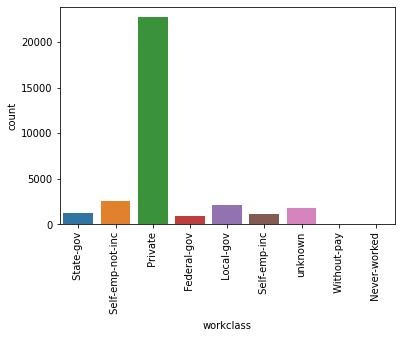

In [ ]:
# 1 - Analisando a variável 'workclass'
sns.countplot(df['workclass'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# A maior parte das pessoas de nossa base de dados trabalham para o setor privado. Já os outros "setores" tem uma quantidade parecida entre eles.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


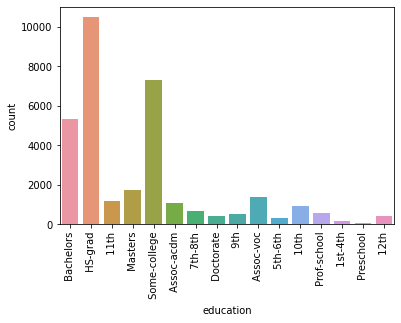

In [ ]:
# 2 - Análise da variável educação
sns.countplot(df['education'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Podemos ver que a maior parte dos dados se concentra nas categorias "padrão" (Ex: Terminar o ensino médio, faculdade, etc.),
# e as categorias mais proximas deste nível vem em seguida com o número diminuindo nos extremos de nível de ensino 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


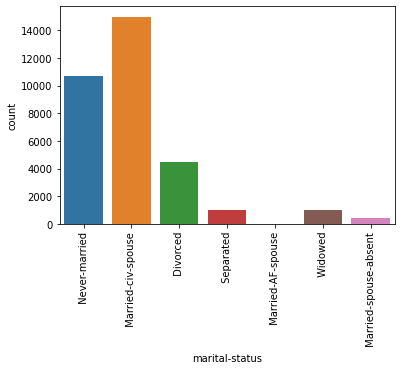

In [ ]:
# 3 - Analisando a variável 'marital-status'
sns.countplot(df['marital-status'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Vemos que a maior parte dos registros tem o valor de casado/casada, isso pode se dar pelo fato de que a base de dados só possui individuos acima dos 17 anos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


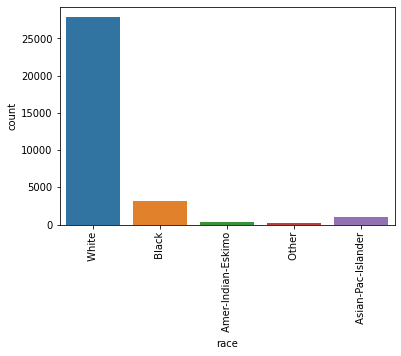

In [ ]:
# 4 - Analisando a variável 'race'
sns.countplot(df['race'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Vemos que brancos são a maior parte, depois negros com uma faixa relevante da população, em seguida por grupos menores de outras etnias.
# Por ser uma base de dados baseada nos Estados Unidos da America, tem uma similaridade com a demográfica americana por etnias.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


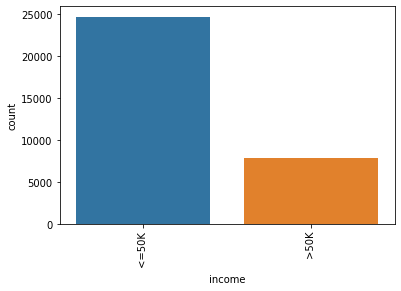

In [ ]:
# 5 - Analisando a variável 'income'
sns.countplot(df['income'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Vemos uma diferença grande entre as categorias, "<=50k" é mais do que o dobro da outra váriavel, assim indicando maior facilidade
# de se ganhar menos do que ganhar mais.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


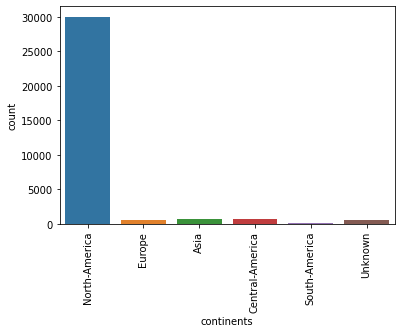

In [ ]:
# 6 - Analisando a variável 'continents'
sns.countplot(df['continents'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Isso nos remete a ideia de que seja uma base de dados coletada nos Estados Unidos, e está correta, já que a base é tirada do censo americano.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


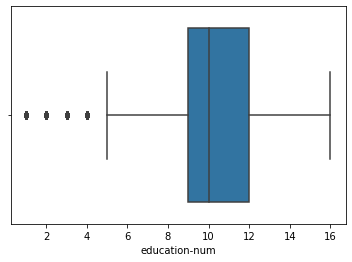

In [ ]:
# 7 - Análise da variável 'education-num'
sns.boxplot(df['education-num'])
plt.show() 

In [ ]:
# Podemos verificar no boxplot a mediana próxima ao valor 10, que é abaixo do nível do "ensino médio" americano que são 12 anos.
# Verificamos 1Q próximo a 9 e 3Q próximo a 12, temos outliers com valores abaixo de 5 e também limites nos valores próximos a 5 e 16.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education-num', ylabel='Density'>

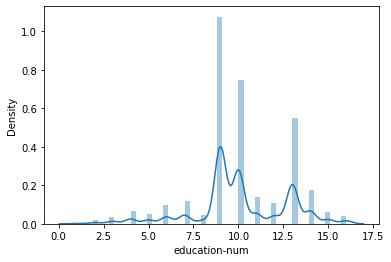

In [ ]:
sns.distplot(df['education-num']) 

In [ ]:
df['education-num'].mean() # Média de anos que as pessoas da base estudaram

10.0806793403151

In [ ]:
df['education-num'].std() # Desvio padrão, verificamos que pelo menos 66% dos dados tem entre 7,5 e 12,5 anos de estudo

2.5727203320673877

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


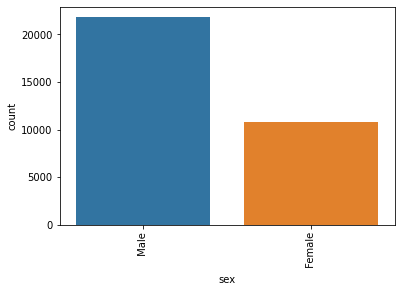

In [ ]:
# 8 - Análise da variável 'sex'
sns.countplot(df['sex'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Temos mais do que o dobro de registros do sexo masculino em relação ao feminino, o que não representa a demografia americana que é próxima de 50%.
# Podemos ter a ideia que a base está inviesada por um dos generos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


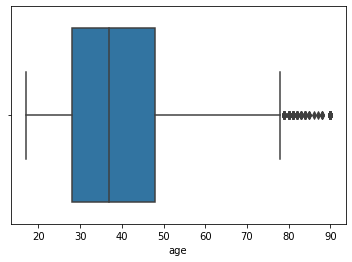

In [ ]:
# 9 - Análise da variável 'age'
sns.boxplot(df['age'])
plt.show() 

In [ ]:
# Podemos verificar no boxplot a mediana próxima ao valor 37.
# Verificamos 1Q próximo a 27 e 3Q próximo a 47.
# Temos outliers com valores acima de 76, e os limites nos valores próximos a 18 e 76.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

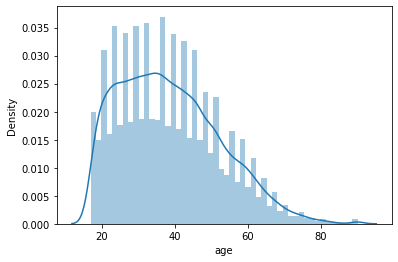

In [ ]:
sns.distplot(df['age']) 

In [ ]:
# Podemos verificar uma assimetria positiva na base em questão de idade.

In [ ]:
df['age'].mean() # Utilizando da média podemos descobrir qual a média de idade em que as pessoas tem uma certa estabilização do salário,
# Já que é uma idade em que a maioria das pessoas está próximo do limite que chegarão em suas carreiras.

38.58164675532078

In [ ]:
df['age'].std() # Vemos que pelo menos 66% dos registros tem entre 25 e 51 anos.

13.640432553581341

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


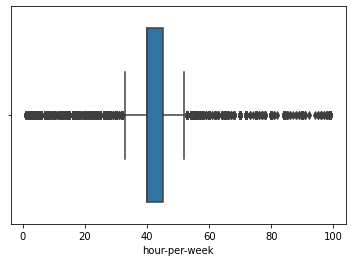

In [ ]:
# 10 - Análise da variável 'hour-per-week'
sns.boxplot(df['hour-per-week'])
plt.show() 

In [ ]:
# Conseguimos verificar que os valores nesta variável são muito concentrados e com os limites estando aproximadamente entre 40 e 43 
# Temos a presença de muitos outliers, limites próximos aos valores 35 e 50 e a mediana próxima a 40.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour-per-week', ylabel='Density'>

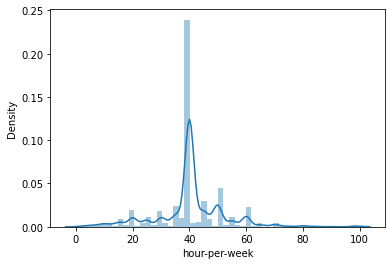

In [ ]:
sns.distplot(df['hour-per-week']) 

In [ ]:
# Temos um gráfico com curtose leptocurtica

In [ ]:
df['hour-per-week'].mean()# Verificamos que a média de trabalho muito próxima ao padrão do mercado

40.437455852092995

In [ ]:
df['hour-per-week'].std()# Pelo menos 66% dos registros trabalham entre 28 à 52 horas semanais

12.347428681731843

# Multivariate data analysis

In this section, you should plot at least 10 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

In [ ]:
# again, feel free to place as many cells to plot the visualizations, 
# as well as describe to the main findings

In [ ]:
# Hipotese 1 - Pessoas brancas ganham mais que pessoas negras.
grafico = px.treemap(df, path=['race', 'income'])
grafico.show()

In [ ]:
# Acima temos um gráfico que está divido entre as etnias da base, e dentro das etnias pela renda. O gráfico prova a nossa hipotese como correta
# Se formos fazer uma média dentro das porções de etnia no gráfico: A etnia branca tem uma porcentagem maior de pessoas que ganham mais de 50 mil
# dólares anuais que pessoas negras.
# As proporções são: 
#                   Brancos - <=50k = 74.41% e >50k = 25.59% 
#                   Negros -  <=50k = 87.61% e >50k = 12.39% 

# Em conclusão, o gráfico aponta que 13.2% a mais de pessoas brancas ganham acima de 50 mil dólares anuais.


In [ ]:
# Hipotese 2 - Pessoas que tem um maior grau de estudo ganham mais.
grafico = px.treemap(df, path=['education', 'income'])
grafico.show()

In [ ]:
# O gráfico acima nos mostra, com uma certa segurança, que nossa afirmação é correta. Porém, ainda assim, podemos analisar que
# as pessoas que são formadas somente no highschool(ensino médio), ou abaixo disso, tem um fluxo quase perfeitamente decrescente.
# Podemos por exemplo: 'formados' no 11º,9º,5-6º e séries abaixo do highschool tem uma % muito baixa de pessoas que ganham acima de 50 dólares anuais.
# Enquanto isso, bacharéis e acima tem uma crescente quase perfeita dessa percentagem.

# Porcentagens comprovantes: 
# 10th - >50k = 6.64%
# 11th - >50k = 5.10%
# 12th - >50k = 7.62%
# Highschool - >50k = 15.95% 
# Bacharel - >50k = 41.47%
# Mestres - >50k = 55.65%
# Doutores - >50k = 74.09%

In [ ]:
# Hipotese 3 - Etnias com mais estudo tem mais renda.
grafico = px.treemap(df, path=['race','education'])
grafico.show()

In [ ]:
# Asiáticos com 27% de bacharel, enquanto brancos tem 16.83% e negros 10.56%
# Mestres asiáticos: 8.46%; Mestres brancos: 5.52%; e Mestres negros: 2.75%;
# Doutores asiáticos: 2.69%; Doutores brancos: 1.32%; e Doutores negros: 0.35%;

In [ ]:
grafico = px.treemap(df, path=['race','income'])
grafico.show()

In [ ]:
# Hipótese incorreta. Podemos ver que asiáticos são a etnia com maior grau de estudo no gráfico de estudo, porém, no gráfico de renda verificamos
# que está incorreto. E a etnia que mais ganha é a branca, seguidos de asiáticos e negros.

In [ ]:
# Hipotese 4 - Homens ganham mais que mulheres 
grafico = px.treemap(df, path=['sex','income'])
grafico.show()

In [ ]:
# Apenas 10.94% das mulheres ganham acima de 50 mil anuais, enquanto homens são 30.57%. Assim concluimos que homens ganham mais que mulheres
# segundo os dados

In [ ]:
# Hipotese 5 - Pessoas mais velhas recebem mais
grafico = px.treemap(df, path=['income','age'])
grafico.show()

In [ ]:
# Verificamos no gráfico acima a visivel diferença entre as idades mais altas (acima de 30), as quais estão em posições de destaque
# e com maior quantidade na porção que ganha acima de 50 mil. Enquanto na porção oposta, verificamos o contrario. Idades abaixo de 35 ocupam
# as posições de destaque.
# Isso nos leva a acreditar que a hipotese está correta

In [ ]:
# Hipotese 6 - Mulheres estão mais em um casamento que homens
grafico = px.treemap(df, path=['sex','relationship'])
grafico.show()

In [ ]:
# Porcentagens resultantes: 
# Homens : 60.54% em um relacionamento
# Mulheres : 14.44% em um relacionamento 
# As porcentagens mostram que a hipotese está incorreta.

In [ ]:
# Hipotese 7: Homens mexicanos ganham mais do que Alemães proporcionalmente
aux = df.loc[df['native-country']==' Mexico']
aux1 = df.loc[df['native-country']==' Germany']
aux3 = [aux,aux1]
aux = pd.concat(aux3)

In [ ]:
grafico = px.treemap(aux, path=['native-country','sex','income']) 
grafico.show() 

In [ ]:
# Hipotese incorreta conseguimos ver justamente o contrário com uma alta diferença, homens mexicanos apenas em 6.23% das vezes ganham acima de 50K enquanto
# alemães são 48.05%. 

In [ ]:
# Hipotese 8: Pessoas que moram na europa ganham mais do que aqueles que vivem na américa do norte
grafico = px.treemap(df, path=['continents','income']) 
grafico.show() 

In [ ]:
# Apenas 24.14% dos norte americanos ganham acima de 50 mil enquanto europeus são 28.71% assim podemos concluir que está correta nossa hipotese

In [ ]:
# Hipotese 9: Asiaticos estudam mais que outras etnias 
grafico = px.treemap(df, path=['continents','education-num','education']) 
grafico.show() 

In [ ]:
# Asiatico: 28.96% dos asiaticos são bachareis,10.91% são mestres e 4.65% são doutores
# Norte americano: 16.08% dos norte americanos são bachareis,5.13% são mestres e 1.12% são doutores
# Europeu: 20% dos europeus são bachareis,6.53% são mestres e 2.97% são doutores
# Central americanos: 8.43% dos central americanos são bachareis,2.34% são mestres e 0.62% são doutores
# Assim temos que nosta hipotese está correta!

In [ ]:
# Hipotese 10: a diferença entre salário entre homens e mulheres é maior na ásia do que na europa
grafico = px.treemap(df, path=['continents','sex','income'])
grafico.show() 

In [ ]:
# Na Ásia a diferença de porcentagem dos generos entre pessoas que ganham acima de 50 mil dólares anuais é 19,17% para os homens ou seja se você é homem
# na Ásia a probabilidade de você ganham acima de 50 mil anuais em relação a uma mulher é 19,17% maior.
# Enquanto isso na europa a diferença é de 20%.
# Assim concluimos que nossa hipotese está incorreta.

# Final Plots

In this section, you need to enhance 5 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

In [ ]:
grafico = px.treemap(df, path=['continents','education-num','education'],color_discrete_sequence=['#086dc0','#ffcb5f','#e31795','#006850','#810145','#009545'],title='Número de pessoas por grupo educacional em diferentes continentes:')
grafico.show() 


In [ ]:
# Este gráfico tem o intuito de realizar a comparação entre continentes para ter um entendimento de qual continente tem uma maior nível de estudo.
# Usando as estatisticas do gráfico acima percebemos que há sim uma diferença entres os continentes:
    # Asiatico: 28.96% dos asiaticos são bachareis,10.91% são mestres e 4.65% são doutores
    # Norte americano: 16.08% dos norte americanos são bachareis,5.13% são mestres e 1.12% são doutores
    # Europeu: 20% dos europeus são bachareis,6.53% são mestres e 2.97% são doutores
    # Central americano: 8.43% dos central americanos são bachareis,2.34% são mestres e 0.62% são doutores

# Temos o resultado que no continente asiatico a população tende a estudar mais e completar mais graus da educação formal que os outros continentes.

In [ ]:
grafico = px.treemap(df, path=['race','education'],color_discrete_sequence=['#086dc0','#ffcb5f','#e31795','#006850','#810145','#009545'],title='Nível Educacional por cada etnia:')
grafico.show() 

In [ ]:
# Este gráfico tem o intuito de comparar as etnias e o nível de educação formal entre elas.
# Usando as estatisticas retiradas do gráfico:
    # asiáticos com 27% de bacharel, enquanto brancos tem 16.83% e negros 10.56%
    # mestres asiáticos 8.46% brancos 5.52% e negros  2.75%
    # doutores asiáticos 2.69%  brancos 1.32% e negros 0.35%

# Vemos uma grande diferença do nível educacional entre as etnias, e isto nos traz outras perguntas como: 
# Há uma relação entre renda e nível de estudo?
# Porque ocorre essa diferença?

In [ ]:
grafico = px.treemap(df, path=['race','income'],color_discrete_sequence=['#086dc0','#ffcb5f','#e31795','#006850','#810145','#009545'],title='Renda por sexo em cada continente:')
grafico.show()

In [ ]:
# Podemos ver que nossa primeira pergunta tem indica uma certa correlação entre renda e nível de estudo e vice-versa.

In [ ]:
# Uma maneira que pode indicar o porque dessa diferença seria trazer um quase ciclo vicioso entre renda e nível dos estudos já que uma etnia tem
# renda menor a correlação indica que terá um nível de educação formal menor também e por isso uma renda menor.

# O gráfico abaixo mostra essa relação do nível de estudo com a renda.

In [ ]:
grafico = px.treemap(df, path=['education','income'],color_discrete_sequence=['#086dc0','#ffcb5f','#e31795','#006850','#810145','#009545'],title='Renda pelos graus de estudo:')
grafico.show()

In [ ]:
# Verificamos a correlação entre quanto maior o nível de estudo formal maior a renda tende a ser. 
# Os grupos bachareis,mestres e doutores comparados ao grupo de formados no ensino médio demonstra essa relação de aumento de renda.
# Enquanto os grupos da pré-escola, 10° ano,11° comparados ao grupo de formados no ensino médio demonstra a relação de queda de renda.

In [ ]:
grafico = px.treemap(df, path=['sex','income'],color_discrete_sequence=['#e31795','#006850'],title='Relacionamentos dividos pelo genero:')
grafico.show()

In [ ]:
# Verificamos uma grande diferença de renda entre os sexos.

In [ ]:
grafico = px.treemap(df, path=['sex','relationship'],color_discrete_sequence=['#e31795','#006850'],title='Relacionamentos dividos pelo genero:')
grafico.show()

In [ ]:
# Conseguimos perceber com estes dados que há uma quantidade de mulheres "solteiras" muito maior do que os homens e também 
# que a renda dos homens tende a ser superior também, podemos constatar que há uma correlação entre estar em casamento com aumento de renda e solteiro
# com uma queda de renda?
grafico = px.treemap(df, path=['relationship','income'],color_discrete_sequence=[],title='Relacionamentos dividos pelo genero:')
grafico.show()

In [ ]:
# Pelos dados do gráfico acima percebemos que sim as categorias esposo e esposa tem uma porcentagem MUITO maior do que as categorias que podem ser consideradas
# solteiras no quesito de renda.

In [ ]:
df.to_csv("Downloads\Database.csv")

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

```
Encontramos inúmeras relações entre as variáveis da base,  porém algo que nos chamou a atenção foi de que essas relações dificilmente são lineares ou seja apresentam o mesmo comportamento sempre( Ex: caso uma aumenta a outra sempre diminua) o que ocorre na maioria das vezes é uma relação que é percebida no geral ou seja na grande maioria dos casos mas ainda sim tem suas exceções a regra.
Vimos que algumas dessas relações no caso de nossa base que representa uma parte da sociedade no caso sociedade americana, tendem a ser quase um ciclo vicioso muitas vezes, como por exemplo as variáveis de nível educacional e renda tem uma relação que se uma aumenta a outra tende a aumentar, e vemos que etnias por exemplo com um menor nível educacional tem uma renda menor por sequencia e por conta de uma renda menor uma educação formal menor também por lógica da relação sendo um ciclo vicioso, que faz com que haja uma segmentação clara entre os grupos.
Achamos muito interessante o  fato de que para explorarmos nossa base tendemos a utilizar muitos de nossos “pré-conceitos” sobre os assuntos no geral para formularmos nossas hipóteses, e muitas das vezes essas hipóteses se provaram reais  e verdadeiras porém também verificamos que existem verdades que levamos como certas em nosso dia a dia que se comprovaram erradas também e muito curiosas porém em grande parte das vezes nos deixando sem explicação do porque daquele comportamento nos dados da base.
Falando sobre o que achamos que fizemos com uma boa qualidade seria tentarmos ao máximo trazer hipóteses que fizessem sentido para nós e tentarmos visualizar o porque destes comportamentos com outras visualizações, acredito que poderíamos ter feito de forma diferente é o utilizar mais formas de visualização para um entendimento mais profundo ainda de nossa base, mesmo que a grande maioria das variáveis fossem categóricas e limitassem de certa forma isto.
Algo que achamos bem surpreendente foi o fato de a grande maioria das variáveis de nossa base terem relações claras, diferente do que achávamos que iriamos encontrar no começo do projeto, e algo que nos elucidou foi a questão de muitas vezes ideias que são rejeitas por certas pessoas se provarem reais e serem basicamente irrefutáveis já que os cálculos são corretos e não se tem muito como rejeitar a comprovação destas através dos dados, porém muitas vezes essas ideias que os dados nos trazem nos deixam com muitas perguntas a serem respondidas que com os dados atuais não são possíveis de serem resolvidas.
Foi muito interessante o quesito de ver como a exploração dos dados e pensar neles através das estáticas que trazem, ser uma forma muito direta de abordar questões, as relações que envolvem essas questões e que muitas vezem apontam para uma certa forma de resolver ou ter ideias sobre outros dados que podemos utilizar para termos outras ideias que levem uma solução final ou a uma ideia nova sobre o tema e questão que seja o tema da base ou até mesmo acharmos temas dentro da base que não esperávamos achar.

```

# Final Steps


1. Save this report as a jupyter notebook (`.ipynb`)
2. Save a copy of this report as a PDF file (`.pdf`)
3. Copy the dataset
4. Zip it all together within a single file (`<your_team_name>.zip`)
5. Send it over using Blackboard.

# Part 2 - Machine learning

#Descriçao de projeto: 

### - Modelos preditivos: Naive Bayes, Árvoes de decisão e Random Forest.
-
### - Pré-Processamento: Foram feitos as etapas de transformaçaõ de atributos categóricos com Label Encoder e OneHotEncoder para trabalharmos com os atributos categóricos da base e o escalonamento foi feito por padronização com StandardScaler para que não ocorram problemas com a escala dos atributos e os métodos tenham um desvio de acerto por conta disto.
-
### - Divisão entre treinamento e teste: Foi feita com Holdout com 85% da base para treinamento e 15% para teste por conta do tamanho da base.
-
### - Para visualizar os resultados dos modelos usamos Matriz de confusão e os valores de precisão,recall e F1 Score dos métodos preditivos para se ter um entendimento de onde o método tem melhor previsão e onde piora esta.

## Pré Processamento - divisão entre previsores e classe

In [ ]:
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,continents
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,North-America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,unknown,>50K,Unknown
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,unknown,<=50K,Unknown
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,unknown,<=50K,Unknown
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,unknown,>50K,Unknown


In [ ]:
df = df[['age','workclass','final-weight','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loos','hour-per-week','native-country','continents','income']]

In [ ]:
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,continents,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,North-America,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,North-America,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,North-America,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,North-America,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,North-America,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,unknown,Unknown,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,unknown,Unknown,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,unknown,Unknown,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,unknown,Unknown,>50K


In [ ]:
df.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'continents', 'income'],
      dtype='object')

In [ ]:
x_census = df.iloc[:, 0:15].values

In [ ]:
y_census = df.iloc[:,15].values

## Tratamento dos atributos categóricos

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
x_census[0]
#1,3,5,6,7,8,9,13,14

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States', 'North-America'], dtype=object)

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()
label_encoder_continent = LabelEncoder()

In [ ]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])
x_census[:,14] = label_encoder_continent.fit_transform(x_census[:,14])

In [ ]:
x_census[0]

array([39, 6, 77516, 9, 13, 4, 0, 1, 4, 1, 2174, 0, 40, 38, 3],
      dtype=object)

## Escalonamento dos atributos

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13,14])], remainder='passthrough')

In [ ]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [ ]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [ ]:
x_census[0]

array([-0.17429511, -0.26209736, -0.01466381, -1.5167923 , -0.18838933,
       -0.29093568,  4.90769968, -0.02073999, -0.2444502 , -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813,  2.76348874, -0.01662771, -0.37949517,
       -0.37774555, -0.17745022, -0.20957797, -0.25595432, -0.33554133,
       -0.06780164, -0.38166338, -0.14260848, -0.35531609, -0.17127887,
       -0.22710355, -0.24494366, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.02416321, -0.06107342, -0.0480488 , -0.04260602, -0.05409379,
       -0.04641598, -0.02933708, -0.05714946, -0.05264698, -0.02

## Divisão da base em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census,y_census,test_size = 0.15, random_state = 0)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 114), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 114), (4885,))

## Naive Bayes 45,52%

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 114), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 114), (4885,))

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento,y_census_treinamento)
previsoes = naive_census.predict(x_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
resultado_naive_bayes =accuracy_score(y_census_teste,previsoes) # Sem a execução do escalonamento o algoritmo naive bayes teve uma performance muito melhor com cerca de 70%
resultado_naive_bayes

0.45527123848515866

0.45527123848515866

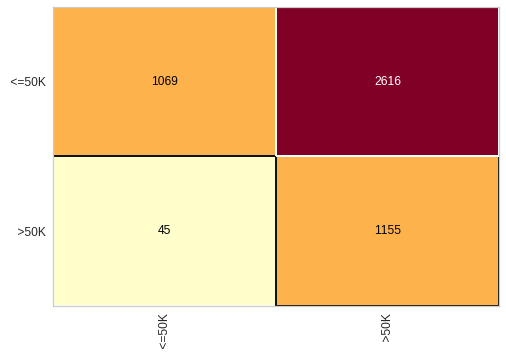

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)
# O modelo previu corretamente que 1069 clientes ganhavam menos ou igual a 50 mil por ano que realmente ganhavam menos de 50 mil ou menos anuais
# O modelo previu incorremante que 2616 cliente ganhavam mais de 50 mil anuais, e que na realidade estes ganhavam menos de 50 mil ou menos anuais
# O modelo previu incorremante que 45 cliente ganhavam mais de 50 mil anuais, e que na realidade estes ganhavam menos de 50 mil ou menos anuais
# O modelo previu corretamente que 1155 clientes ganhavam mais 50 mil por ano que realmente ganhavam mais de 50 mil anuais

In [ ]:
print(classification_report(y_census_teste, previsoes))
# <=50k =  O algoritmo consegue identificar 29% das pessoas que ganham menos ou igual a 50 mil porém a precisão dentro desse valor é de altos 96%
# 50 k = O algoritmo consegue identificar 96% das pessoas que ganham mais de 50 mil porém a precisão dentro desse valor é de apenas 31%

              precision    recall  f1-score   support

       <=50K       0.96      0.29      0.45      3685
        >50K       0.31      0.96      0.46      1200

    accuracy                           0.46      4885
   macro avg       0.63      0.63      0.46      4885
weighted avg       0.80      0.46      0.45      4885



## Árvores de decisão 82,14%

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(x_census_treinamento,y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_census.predict(x_census_teste)
previsoes

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
resultado_arvores =accuracy_score(y_census_teste,previsoes)
resultado_arvores

0.8214943705220061

0.8214943705220061

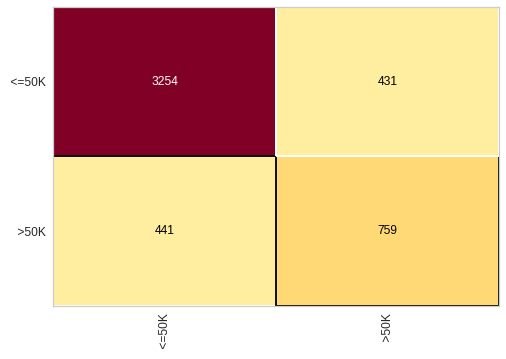

In [ ]:
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)
# O modelo previu corretamente que 3254 clientes ganhavam menos ou igual a 50 mil por ano que realmente ganhavam menos de 50 mil ou menos anuais
# O modelo previu incorremante que 431 cliente ganhavam mais de 50 mil anuais, e que na realidade estes ganhavam menos de 50 mil ou menos anuais
# O modelo previu incorremante que 441 cliente ganhavam mais de 50 mil anuais, e que na realidade estes ganhavam menos de 50 mil ou menos anuais
# O modelo previu corretamente que 759 clientes ganhavam mais 50 mil por ano que realmente ganhavam mais de 50 mil anuais

In [ ]:
print(classification_report(y_census_teste, previsoes))
# <=50k =  O algoritmo consegue identificar 88% das pessoas que ganham menos ou igual a 50 mil e a precisão dentro desse valor é de 88%
# 50 k = O algoritmo consegue identificar 63% das pessoas que ganham mais de 50 mil porém a precisão dentro desse valor é de 64%

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      3685
        >50K       0.64      0.63      0.64      1200

    accuracy                           0.82      4885
   macro avg       0.76      0.76      0.76      4885
weighted avg       0.82      0.82      0.82      4885



## RandomForest 86,10%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
random_forest_census.fit(x_census_treinamento,y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes= random_forest_census.predict(x_census_teste)
previsoes

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
resultado_random_forest = accuracy_score(y_census_teste,previsoes)
resultado_random_forest

0.8610030706243603

0.8610030706243603

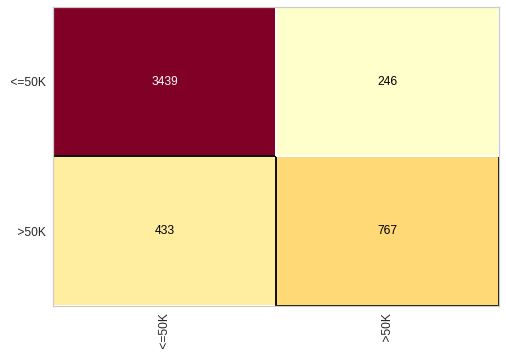

In [ ]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)
# O modelo previu corretamente que 3439 clientes ganhavam menos ou igual a 50 mil por ano que realmente ganhavam menos de 50 mil ou menos anuais
# O modelo previu incorremante que 246 cliente ganhavam mais de 50 mil anuais, e que na realidade estes ganhavam menos de 50 mil ou menos anuais
# O modelo previu incorremante que 433 cliente ganhavam mais de 50 mil anuais, e que na realidade estes ganhavam menos de 50 mil ou menos anuais
# O modelo previu corretamente que 767 clientes ganhavam mais 50 mil por ano que realmente ganhavam mais de 50 mil anuais

In [ ]:
print(classification_report(y_census_teste, previsoes))
# <=50k =  O algoritmo consegue identificar 93% das pessoas que ganham menos ou igual a 50 mil e a precisão dentro desse valor é de 89%
# 50 k = O algoritmo consegue identificar 64% das pessoas que ganham mais de 50 mil porém a precisão dentro desse valor é de 76%

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      3685
        >50K       0.76      0.64      0.69      1200

    accuracy                           0.86      4885
   macro avg       0.82      0.79      0.80      4885
weighted avg       0.86      0.86      0.86      4885



In [ ]:
resultados = []
resultados.append(round(resultado_naive_bayes*100,2))
resultados.append(round(resultado_arvores*100,2))
resultados.append(round(resultado_random_forest*100,2))
resultados
nomes = ['Naive-Bayes','Árvores de decisão','Random Forest']

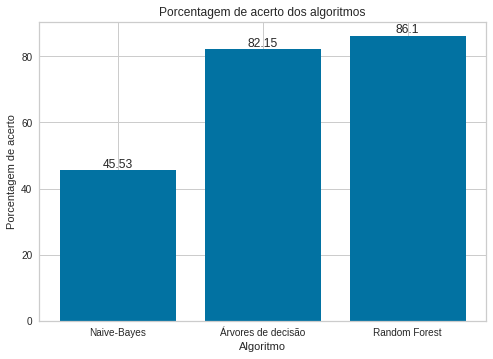

In [ ]:
plt.ylabel('Porcentagem de acerto')
plt.xlabel('Algoritmo')
plt.title('Porcentagem de acerto dos algoritmos')

barplot=plt.bar(nomes,resultados)
plt.bar_label(barplot,labels=resultados)
plt.show()


### Resultados dos algoritmos acima
#### O algoritmo naive bayes tem um desenho muito ruim, até se jogassemos uma moeda teriamos um desempenho superior, já os algoritmos de arvores de decisão e random forest tem uma taxa de acerto muito melhor, essa diferença se dá principalmente pelo algoritmo naive bayes análisar os atributos individualmente e pela questão dos valores da base terem sido padronizados, o que não ajuda o algoritmo neste caso, já os algoritmos de arvores se deram muito melhor com está base e foram escolhidos pela fácil compreensão.
#### Não só usamos a acurracia para decidir qual o melhor modelo neste caso mas também os valores de precisão,recall e F1 Score dos métodos preditivos para se ter um entendimento de onde o método tem melhor previsão e onde piora esta.
#### Neste caso o algoritmo que teve os melhores indicadores foi o algoritmo RandomForest que trabalha com multiplas árvores de decisão para atingir o resultado final.
## Random Forest:
             precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      3685
        >50K       0.76      0.64      0.69      1200

    accuracy                           0.86      4885

## Árvores de decisão: 
             precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      3685
        >50K       0.64      0.63      0.64      1200

    accuracy                           0.82      4885

#### Análisando os dados acima vemos que o algoritmo RandomForest teve um desempenho superior as Árvores de decisão
     